# Q1: Simple numerical integral

int quad: 
1.7724538509027912
4.6576049804237824e-14
int Simpson: 
1.7724538509027907


/var/folders/bl/k64g0s790qg_4hq65kpn2k340000gn/T/ipykernel_62466/1829770409.py:23: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral_simps = integrate.simps(f, x)


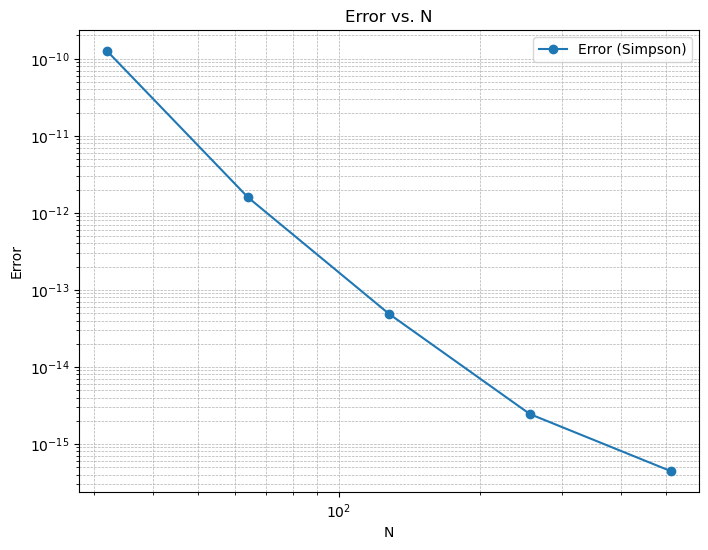

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

#part1

def g(x):
    return np.exp(-x**2)

I, err = integrate.quad(g,-5, 5, epsabs=1.e-7, epsrel=1.e-7)
print('int quad: ')
print(I)
print(err)

 #part 2

N_values = [32, 64, 128, 256, 512]
errors = []

for N in N_values:
    x = np.linspace(-5, 5, N)
    f = np.exp(-x**2)
    integral_simps = integrate.simps(f, x)
    errors.append(abs(integral_simps - I))
print('int Simpson: ')
print(integral_simps)
# Plot 
plt.figure(figsize=(8, 6))
plt.loglog(N_values, errors, marker='o', label='Error (Simpson)')
plt.xlabel('N')
plt.ylabel('Error')
plt.title('Error vs. N')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


# Q7: Noisy signal

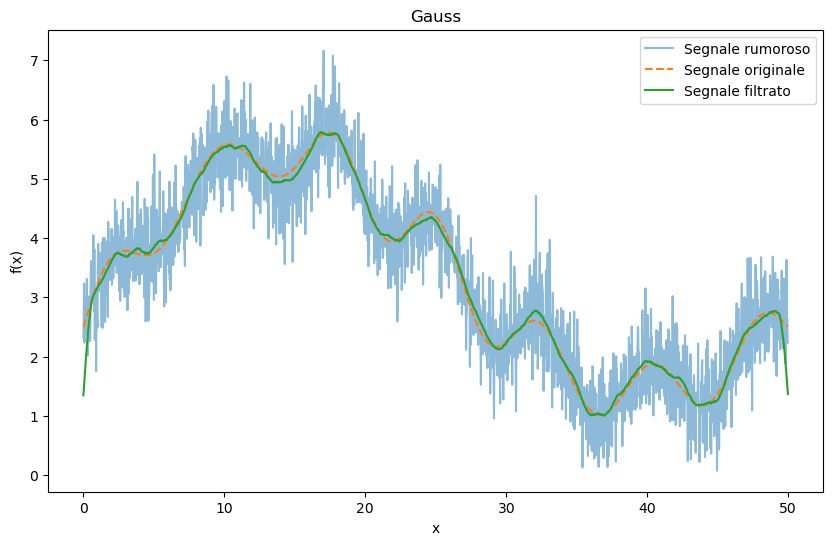

In [8]:
from scipy.signal import convolve
from scipy.signal.windows import gaussian
import numpy as np
import matplotlib.pyplot as plt

def fdata(x, L):
    A = L / 10.0
    return 2 * np.sin(2 * np.pi * x / L) + x * (L - x) ** 2 / L ** 3 * np.cos(x) + \
           5 * x * (L - x) / L ** 2 + A / 2 + 0.1 * A * np.sin(13 * np.pi * x / L)



N = 2048
L = 50.0
x = np.linspace(0, L, N, endpoint=False)
orig = fdata(x, L)
noisy = orig + 0.5 * np.random.randn(N)


M = 50  
std = 15 
Gauss = gaussian(M, std)
Gauss /= Gauss.sum() 

filtro = convolve(noisy, Gauss, mode='same', method='auto')


plt.figure(figsize=(10, 6))
plt.plot(x, noisy, label="Segnale rumoroso", alpha=0.5)
plt.plot(x, orig, label="Segnale originale", linestyle='--')
plt.plot(x, filtro, label="Segnale filtrato")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gauss')
plt.legend()
plt.show()